In [1]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 149 (delta 25), reused 35 (delta 11), pack-reused 89
Receiving objects: 100% (149/149), 14.50 MiB | 30.31 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/SRU-deeplearning-workshop


dataset file

```
# for more information read "19-Intro2ML-HodaDataset.ipynb"
import cv2
import numpy as np
from scipy import io

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('./dataset/Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,size**2])
    X_test = np.reshape(X_test_5by_5, [-1,size**2])
    
    return X_train, y_train, X_test, y_test
```



In [16]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from dataset import load_hoda
import numpy as np

In [3]:
X_train, y_train, X_test, y_test = load_hoda()

In [4]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.score(X_test,y_test)

0.96

In [7]:
X_test[0].shape

(25,)

In [9]:
sample = 24

X = X_test[sample]

# one sample
predicted_class = clf.predict([X])
actual_class = y_test[sample]

print ("Sample {} is a {}, and you prediction is: {}.".format(sample, actual_class, predicted_class[0]))

Sample 24 is a 9, and you prediction is: 9.


In [10]:
# the fraction is based on 1/3
print(clf.predict_proba([X]))

[[0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.66666667]]


In [11]:
pred_classes = clf.predict(X_test)
true_classes = y_test

print("Predicted classes:")
print(pred_classes)
print("True classes:")
print(true_classes)

Predicted classes:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 3 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 2 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 7 6 2 4 1 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 7 3 5 5 0 0 2 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 1 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 5 3 8 9 6 7 7 2 3 0 1 4 9 5]
True classes:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


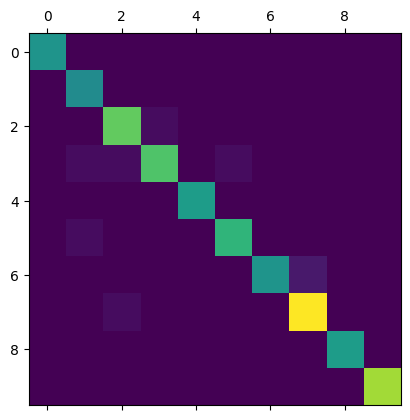

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_classes)
plt.matshow(cm)

In [18]:
np.mean(y_test == pred_classes) * 100

96.0

In [14]:
acc = clf.score(X_test, y_test)
print ("Accuracy is %.2f %%" %(acc*100))

Accuracy is 96.00 %
